In [15]:
from contextlib import contextmanager
import ipywidgets
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
_default_size = (9, 4)
def set_figsize(x=_default_size[0], y=_default_size[1]):
    """ set the figure size of the plot to the specified size in inches"""

    mpl.rcParams['figure.figsize'] = x, y

@contextmanager
def figsize(x=8, y=3):
    """Temporarily set the figure size using 'with figsize(a, b):'"""

    size = pylab.rcParams['figure.figsize']
    set_figsize(x, y)
    yield
    pylab.rcParams['figure.figsize'] = size


(157.0, 164.5)

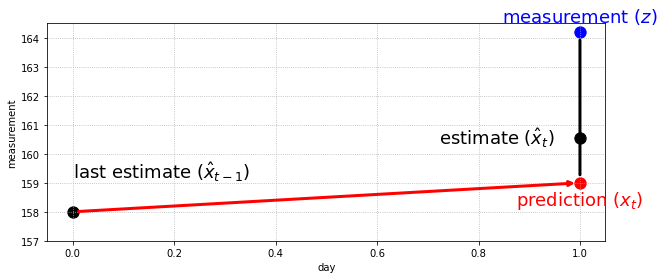

In [34]:
plt.figure()
ax = plt.axes()
ax.annotate('', xy=[1,159], xytext=[0,158],
            arrowprops=dict(arrowstyle='->',
                            ec='r', lw=3, shrinkA=6, shrinkB=5))

ax.annotate('', xy=[1,159], xytext=[1,164.2],
            arrowprops=dict(arrowstyle='-',
                            ec='k', lw=3, shrinkA=8, shrinkB=8))

pred_y = 159
meas_y = 164.2
factor = 0.3
est_y = pred_y + factor * (meas_y - pred_y)
plt.scatter ([0,1], [158.0,est_y], c='k',s=128)
plt.scatter ([1], [meas_y], c='b',s=128)
plt.scatter ([1], [pred_y], c='r', s=128)
plt.text (1.0, 158.8, "prediction ($x_t)$", ha='center',va='top',fontsize=18,color='red')
plt.text (1.0, 164.4, "measurement ($z$)",ha='center',va='bottom',fontsize=18,color='blue')
plt.text (0, 159.8, "last estimate ($\hat{x}_{t-1}$)", ha='left', va='top',fontsize=18)
plt.text (0.95, est_y, "estimate ($\hat{x}_{t}$)", ha='right', va='center',fontsize=18)
plt.xlabel('day')
plt.ylabel('measurement')
ax.xaxis.grid(True, which="major", linestyle='dotted')
ax.yaxis.grid(True, which="major", linestyle='dotted')
plt.ylim(157, 164.5)

In [35]:
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate):
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights:
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter
        estimated_weight = predicted_weight + factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(estimated_weight=initial_estimate, gain_rate=1)

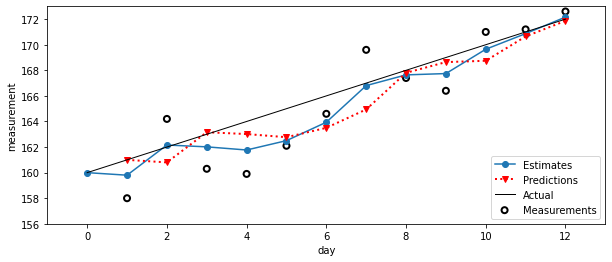

In [36]:
from source import book_plots
# plot results
def plot_gh_results(weights, estimates, predictions, actual, time_step=0):
    n = len(weights)
    if time_step > 0:
        rng = range(1, n+1)
    else:
        rng = range(n, n+1)
    xs = range(n+1)
    book_plots.plot_measurements(range(1, len(weights)+1), weights, color='k', lines=False)
    book_plots.plot_filter(xs, estimates, marker='o', label='Estimates')
    book_plots.plot_track(xs[1:], predictions, c='r', marker='v', label='Predictions')
    plt.plot([xs[0], xs[-1]], actual, c='k', lw=1, label='Actual')
    plt.legend(loc=4)
    book_plots.set_labels(x='day', y='measurement')
    plt.xlim([-1, n+1])
    plt.ylim([156.0, 173])

book_plots.set_figsize(10)
plot_gh_results(weights, estimates, predictions, [160, 172])

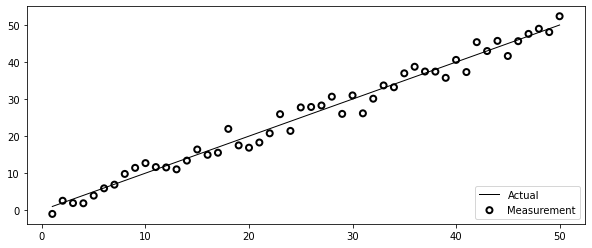

In [45]:
from numpy.random import randn
noise = 2 * np.random.randn(50)
xs = np.arange(1, 51)

plt.plot(xs, xs, c='k', lw=1, label='Actual')
plt.scatter(xs, xs+noise, marker='o', edgecolor='k', facecolor='none', lw=2, label='Measurements')
plt.legend(loc=4)
#
